In [21]:
## Setup and Load Data
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load private loan PD values from CSV
print("Loading Private_PD.csv...")
private_pd_df = pd.read_csv('Private_PD.csv')
private_PD = private_pd_df['PD'].values
print(f"Loaded {len(private_PD)} PD values for personal loans.\n")

Loading Private_PD.csv...
Loaded 150 PD values for personal loans.



In [22]:
## Initialize Parameters and Loan Types
# Fixed parameters
n_assets = 100 
n_simulations = 1000
rho = 0.2

# Lending amount (total portfolio)
total_lending_amount = 50000000

# Randomly assigning personal (0) and business (1) loans
loan_types = np.random.choice([0, 1], n_assets, p=[0.7, 0.3])  # assuming 70% personal and 30% business
print(f"Assigned {np.sum(loan_types == 0)} personal loans and {np.sum(loan_types == 1)} business loans.\n")

Assigned 67 personal loans and 33 business loans.



In [23]:
## Assign PD Values
# Adjust PD for personal loans
n_personal_loans = np.sum(loan_types == 0)
n_business_loans = n_assets - n_personal_loans

# Generate random PD for business loans
business_PD = np.random.uniform(0.0001, 0.30, n_business_loans)
print(f"Generated PD values for {n_business_loans} business loans.\n")

# Combine PD values
PD = np.zeros(n_assets)
PD[loan_types == 0] = np.random.choice(private_PD, n_personal_loans, replace=True)
PD[loan_types == 1] = business_PD
print("Combined PD values for personal and business loans.\n")

Generated PD values for 33 business loans.

Combined PD values for personal and business loans.



In [24]:
## Assign Loan Amounts and LGD
# Initialize loan amounts and LGD
loan_amounts = np.zeros(n_assets)
LGD = np.zeros(n_assets)

# Assign loan amounts and LGD based on PD and loan type
for i in range(n_assets):
    if loan_types[i] == 0:  # Personal loan
        LGD[i] = 1
        if PD[i] < 0.25:
            loan_amounts[i] = 11500
        else:
            loan_amounts[i] = 0
    else:  # Business loan
        if PD[i] < 0.0001:
            loan_amounts[i] = 600000
            LGD[i] = 0.25
        elif PD[i] < 0.0007:
            loan_amounts[i] = 450000
            LGD[i] = 0.25
        elif PD[i] < 0.0019:
            loan_amounts[i] = 300000
            LGD[i] = 0.4
        elif PD[i] < 0.0536:
            loan_amounts[i] = 100000
            LGD[i] = 0.4
        elif PD[i] < 0.2523:
            loan_amounts[i] = 25000
            LGD[i] = 0.55
        else:
            loan_amounts[i] = 0
            LGD[i] = 0.55
print("Assigned loan amounts and LGD values based on PD and loan type.\n")

Assigned loan amounts and LGD values based on PD and loan type.



In [25]:
## Loss Simulation
# Losses
losses = np.zeros(n_simulations)

# Loss simulation
for i in range(n_simulations):
    correlated_randoms = np.dot(rho, np.random.normal(size=n_assets))
    adjusted_PD = np.percentile(correlated_randoms, PD * 100)
    default_events = correlated_randoms < adjusted_PD
    loss = np.sum(default_events * LGD * loan_amounts)
    losses[i] = loss

print("Loss simulation finished.\n")

Loss simulation finished.



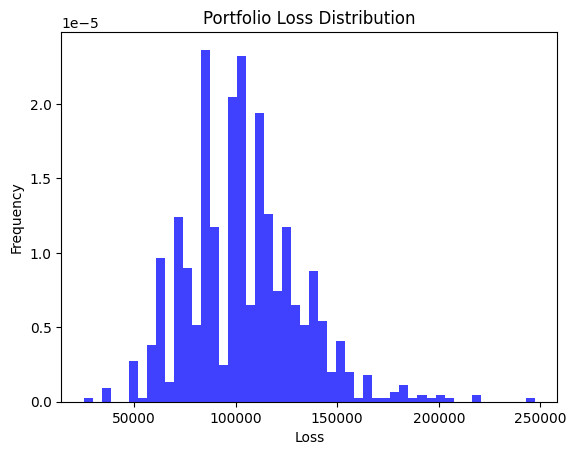

Expected Loss (EL): 104297.25€

Unexpected Loss (UL): 27710.79€

Value at Risk (VaR) 99%: 182320.00€

Value at Risk (VaR) 95%: 151500.00€



In [26]:
## Plot and Results
# Plot
plt.hist(losses, bins=50, density=True, alpha=0.75, color='blue')
plt.title('Portfolio Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

# Expected Loss (EL)
EL = np.mean(losses)
print(f"Expected Loss (EL): {EL:.2f}€\n")

# Unexpected Loss (UL)
UL = np.std(losses)
print(f"Unexpected Loss (UL): {UL:.2f}€\n")

# Value at Risk (VaR) 99%
VaR_99 = np.percentile(losses, 99)
print(f"Value at Risk (VaR) 99%: {VaR_99:.2f}€\n")

# Value at Risk (VaR) 95%
VaR_95 = np.percentile(losses, 95)
print(f"Value at Risk (VaR) 95%: {VaR_95:.2f}€\n")